In [100]:
from keras.datasets import mnist
import numpy as np
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255. #and x_test
x_val = x_train[55000:]
x_train = x_train[:55000]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_val = y_train[55000:]
y_train = y_train[:55000]

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [33]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size, bol):
    loss_train = list(); loss_test = list(); acc_train = list(); acc_test = list()
    for i in range(epochs):
        modelo.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=1, validation_data=(x_test, y_test))
        aux_train = modelo.evaluate(x_train, y_train, verbose=0)
        aux_test = modelo.evaluate(x_test, y_test, verbose = 0)
        if bol==False:
            loss_train.append(aux_train)
            loss_test.append(aux_test)
        elif bol==True:
            acc_test.append(aux_test[1])
            acc_train.append(aux_train[1])
            loss_train.append(aux_train[0])
            loss_test.append(aux_test[0])
    if bol==False:            
        return(loss_train, loss_test)
    if bol==True:
        return(loss_train, loss_test, acc_train, acc_test)

def graficar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size):
    loss_train, loss_test, acc_train, acc_test = retornar(modelo, x_train, y_train, x_test, y_test, epochs, batch_size)
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, loss_train, '-', label='loss train')
    plt.plot(epl, loss_test, '-', label='loss test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs epoch')
    plt.show()
    fig = plt.figure(figsize = (12,4))
    plt.plot(epl, acc_train, '-', label='acc train')
    plt.plot(epl, acc_test, '-', label='acc test')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs epoch')
    plt.show()
            
def subplot_loss(epochs, ns, distribucion, nombres, subs):
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[0], '-g')
        plt.plot(epl, aux[1], '-r')
    blue_line = mlines.Line2D([], [], color='g')
    reds_line = mlines.Line2D([], [], color='r')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Loss vs epoch', fontsize=16)
    plt.show()
    
def subplot_acc(epochs, ns, distribucion, nombres, subs):
    epl = list(range(1, epochs+1))
    fig = plt.figure(figsize=(18,8))
    for i in range(ns):
        aux = subs[i]
        plt.subplot(distribucion+i)
        plt.title(nombres[i])
        plt.plot(epl, aux[2], '-y')
        plt.plot(epl, aux[3], '-b')
    blue_line = mlines.Line2D([], [], color='y')
    reds_line = mlines.Line2D([], [], color='b')
    fig.legend((blue_line, reds_line), ('train', 'test'), 'upper right')
    fig.suptitle('Accuracy vs epoch', fontsize=16)
    plt.show()

In [94]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
input_img = Input(shape=(784,))
encoded = Dense(32, activation='sigmoid')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)
encoder = Model(input=input_img, output=encoded)
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
#autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
#autoencoder.save('basic_autoencoder_768x32.h5')

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [28]:
dimensiones = list([2,8,32,64])
subs = list()
for i in range(len(dimensiones)):
    input_img = Input(shape=(784,))
    encoded = Dense(dimensiones[i], activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(dimensiones[i],))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    #autoencoder.fit(x_train,x_train,epochs=50,batch_size=32,validation_data=(x_val,x_val))
    subs.append(retornar(autoencoder, x_train, x_train, x_val, x_val, 50, 32, False))
    autoencoder.save('basic_autoencoder_768x'+str(dimensiones[i])+'.h5')

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 55000 samples, validate on 5000 samples
Epoch 1/1
55000/55000 [==============================] - 7s 125us/step - loss: 0.4541 - val_loss: 0.3471

In [31]:
import pickle
#with open('T2.P3.a.pickle', 'wb') as handle:
    #pickle.dump(subs, handle, protocol=pickle.HIGHEST_PROTOCOL)
#with open('T2.P3.a.pickle', 'rb') as handle:
    #subs = pickle.load(handle)

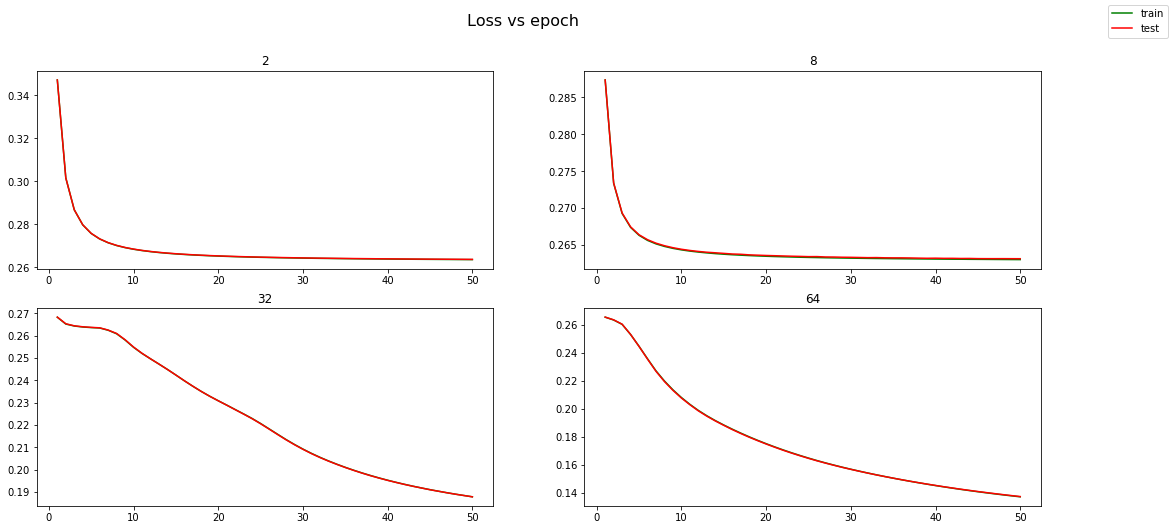

In [34]:
subplot_loss(50, 4, 221, ['2','8','32','64'], subs)

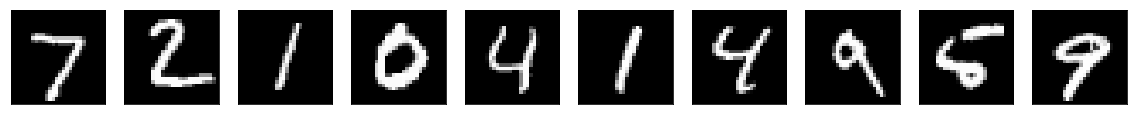

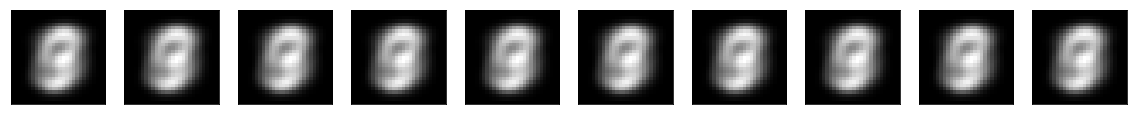

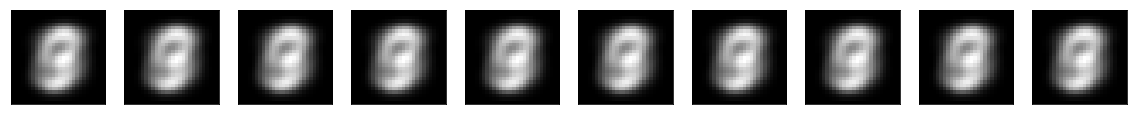

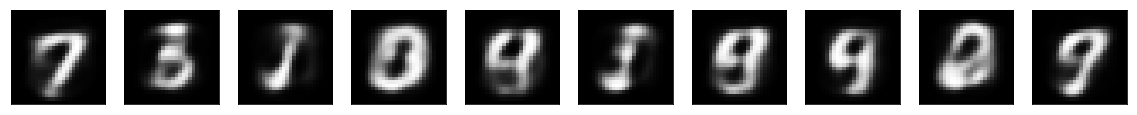

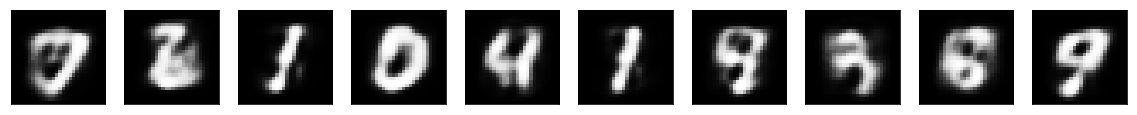

In [61]:
from keras.models import load_model

plt.figure(figsize=(20, 4))
for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

dimensiones = list([2,8,32,64])
for i in range(len(dimensiones)):
    autoencoder = load_model('basic_autoencoder_768x'+str(dimensiones[i])+'.h5')
    decoded_test = autoencoder.predict(x_test)
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_test[i].reshape(28, 28),cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [85]:
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)

In [101]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
pca = PCA(n_components=32)
#PCA
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)
#AUTOENCODER
autoencoder = load_model('basic_autoencoder_768x32.h5')
encoder = Model(inputs=autoencoder.layers[0].input, outputs=autoencoder.layers[1].output)
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)
#CLASIFICATION
clf = KNeighborsClassifier(10)
clf.fit(pca_train, y_train)
print('Classification Accuracy PCA %.2f' % clf.score(pca_test,y_test))
clf = KNeighborsClassifier(10)
clf.fit(encoded_train, y_train)
print('Classification Accuracy %.2f' % clf.score(encoded_test,y_test))

Classification Accuracy PCA 0.59
Classification Accuracy 0.54
